## Tellus API Example

### Tellus API

[Tellus API リファレンス](https://www.tellusxdp.com/ja/dev/api)

* OpenStreatMap  
  ```GET https://gisapi.tellusxdp.com/osm/{z}/{x}/{y}.png```
* ASNARO-1  
  ```GET https://gisapi.tellusxdp.com/ASNARO-1/{scene_id}_AS1/{z}/{x}/{y}.png```
* PALSAR-2  
  ```GET https://gisapi.tellusxdp.com/PALSAR-2/ALOS{scene_id}/{z}/{x}/{y}.png```
* Landsat-8  
  ```GET https://gisapi.tellusxdp.com/landsat8/{z}/{x}/{y}.png```
* AVNIR-2  
  ```GET  https://gisapi.tellusxdp.com/blend/{z}/{x}/{y}.png?opacity=1&r=4&g=3&b=2&rdepth=1&gdepth=1&bdepth=1&preset=ndvi```

In [1]:
class Tellus:
    def __init__(self, bearer, domain="gisapi.tellusxdp.com", z=0, x=0, y=0):
        self.domain = domain
        self.bearer = bearer
        self.z = z
        self.x = x
        self.y = y
    
    def reset(self, z=0, x=0, y=0):
        self.z = z
        self.x = x
        self.y = y

    def zoom_in(self, x=0, y=0):
        if x not in [0, 1] or y not in [0, 1]:
            return

        self.x *= 2
        self.y *= 2

        self.z += 1
        self.x += x
        self.y += y

    def get(self, form, scene_id=None, z=None, x=None, y=None, query=None):
        if query is None:
            query = ""
        else:
            query = "?" + query
            
        z_ = z if z is not None else self.z
        x_ = x if x is not None else self.x
        y_ = y if y is not None else self.y
        
        if form in ["osm", "landsat8", "blend"]:
            uri_ = "https://{}/{}/{}/{}/{}.png{}".format(self.domain, form, z_, x_, y_, query)
        else:
            return
        
        import requests
        res_ = requests.get(uri_, headers={"Authorization": "Bearer " + self.bearer})
        if res_.status_code != 200:
            print(res_.status_code, uri_)
            return

        import numpy
        from PIL import Image
        from io import BytesIO
        image_ = Image.open(BytesIO(res_.content))
        if image_.mode == "P":
            image_ = image_.convert('RGB')
        return numpy.asarray(image_)

In [2]:
def show(image):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.imshow(image)
    plt.show()

### Tellus インスタンス

APIトークンを [Tellus](https://www.tellusxdp.com/ja/) >> [マイページ](https://www.tellusxdp.com/ja/mypage/email) >> [ＡＰＩアクセス設定](https://www.tellusxdp.com/ja/mypage/clients) から取得する。

In [3]:
BEARER_TOKEN = "********"

APIトークン設定

In [4]:
tellus = Tellus(BEARER_TOKEN)

### タイル座標

京都のタイル座標を確認してみる

参考：[タイル座標確認ツール](http://gsj-seamless.jp/labs/tools/tileCoord.html) で直接確認できる

z:0 x:0 y:0


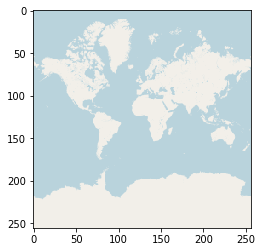

z:13 x:7185 y:3244


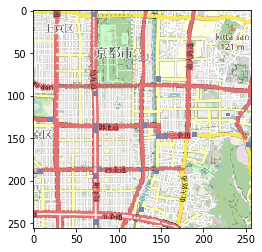

In [5]:
tellus.reset()

print("z:{} x:{} y:{}".format(tellus.z, tellus.x, tellus.y))
show(tellus.get("osm"))

tellus.zoom_in(x=1)
tellus.zoom_in(x=1, y=1)
tellus.zoom_in(x=1, y=1)
tellus.zoom_in(x=0, y=0)
tellus.zoom_in(x=0, y=0)
tellus.zoom_in(x=0, y=1)
tellus.zoom_in(x=0, y=0)
tellus.zoom_in(x=0, y=1)
tellus.zoom_in(x=1, y=0)
tellus.zoom_in(x=0, y=1)
tellus.zoom_in(x=0, y=1)
tellus.zoom_in(x=0, y=0)
tellus.zoom_in(x=1, y=0)

print("z:{} x:{} y:{}".format(tellus.z, tellus.x, tellus.y))
show(tellus.get("osm"))

### AVNIR-2
AVNIR-2(高性能可視近赤外放射計2型)画像を取得してみる。

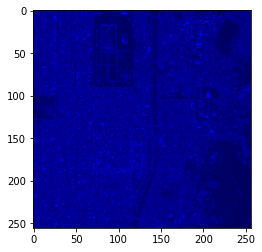

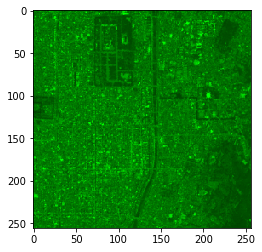

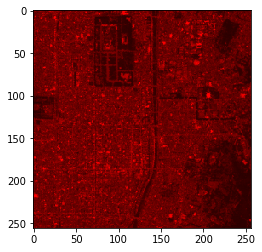

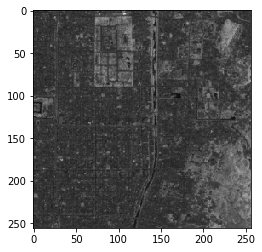

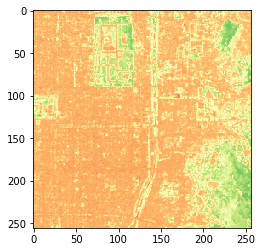

In [6]:
show(tellus.get("blend", query="r=3&g=2&b=1&rdepth=0&gdepth=0")) # 青
show(tellus.get("blend", query="r=3&g=2&b=1&bdepth=0&rdepth=0")) # 緑
show(tellus.get("blend", query="r=3&g=2&b=1&gdepth=0&bdepth=0")) # 赤
show(tellus.get("blend", query="r=4&g=4&b=4")) # 近赤外
show(tellus.get("blend", query="preset=ndvi")) # NVDI